In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

In [121]:
# Code challenge determinant 

m = 31
m2 = 42

A = np.random.randn(m,m)
A[:,0] = A[:,1]

print(np.linalg.matrix_rank(A))
print(np.linalg.det(A))
print(np.linalg.cond(A))

30
8.262864287735908
4.286642699426894e+16


In [135]:
# Code challenge determinant 2

m = 6

A = np.random.randn(m,m)
print(np.linalg.det(A))

As = A[[1,0,2,3,4,5],:] 

print(np.linalg.det(As))

Ass = A[[1,0,2,3,5,4],:] 

print(np.linalg.det(Ass))


18.950626432120835
-18.950626432120835
18.950626432120835


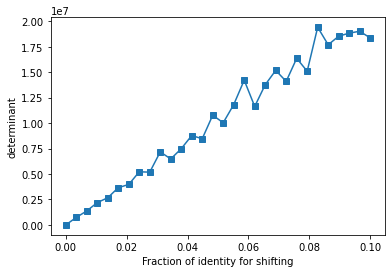

In [141]:
# Code challenge determinant 3

lambdas = np.linspace(0,.1,30)

tmp = np.zeros(1000)
dets = np.zeros(len(lambdas))

for deti in range (len(lambdas)):
    for i in range(1000):
        M = np.random.randn(20,20)
        M[:,0] = M[:,1]

        tmp[i] = abs(np.linalg.det(M + lambdas[deti]*np.eye(20) ) )
    dets[deti] = np.mean(tmp)

plt.plot(lambdas,dets,'s-')
plt.xlabel('Fraction of identity for shifting')
plt.ylabel('determinant')
plt.show()

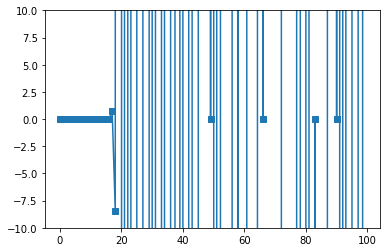

In [167]:
# Code challenge 3
s = 100

dets = np.zeros((s,2))

for i in range(s):
    A = np.round(np.random.randn(i,i))
    B = np.round(np.random.randn(i,i))
    AB = A@B

    dets[i,0] = np.linalg.det(A)*np.linalg.det(B)
    dets[i,1] = np.linalg.det(A@B)

plt.plot(dets[:,0]-dets[:,1],'s-')
plt.ylim([-10,10])
plt.show()


---
# VIDEO: Concept and uses of the inverse
---


In [53]:
# size of square matrix
m = 3

# generate random matrix
A = np.random.randn(m,m)

# compute its inverse
Ainv = np.linalg.inv(A)

# and check the multiplication
idm = A@Ainv

# print the matrix. Note the computer rounding errors on the off-diagonals
print(idm)

[[ 1.00000000e+00  1.01777132e-17  1.05120233e-16]
 [-1.24314526e-16  1.00000000e+00  2.09850408e-16]
 [ 7.54155610e-17  6.31545222e-18  1.00000000e+00]]


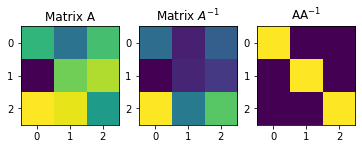

In [54]:
# show in an image
plt.subplot(131)
plt.imshow(A)
plt.title('Matrix A')

plt.subplot(132)
plt.imshow(Ainv)
plt.title('Matrix $A^{-1}$')

plt.subplot(133)
plt.imshow(idm)
plt.title('AA$^{-1}$')

plt.show()


---
# VIDEO: Computing the inverse via row reduction
---


In [ ]:

# matrix size
m = 4

# random integers matrix
A = Matrix( np.round(10*np.random.randn(m,m)),dtype='float' )

# augment A and identity
Aaug = Matrix( np.concatenate((A,np.eye(m,m)),axis=1) )
print('Size of Aaug:',Aaug.shape)

# rref
Asol = Aaug.rref()
Asol = Asol[0]
Ainvrref = Asol[:,m:m*2]
Ainv = A.inv()

In [ ]:
# show the augemented matrices
plt.subplot(211)
plt.imshow(matrix2numpy(Aaug,dtype='float'),vmin=-5,vmax=5)
plt.title('A|I'), plt.axis('off')

plt.subplot(212)
plt.imshow(matrix2numpy(Asol,dtype='float'))
plt.title('I|A$^{-1}$'), plt.axis('off')

plt.show()

In [ ]:
# show the square matrices
plt.subplot(131)
plt.imshow(matrix2numpy(A,dtype='float'))
plt.title('Matrix A'), plt.axis('off')

plt.subplot(132)
plt.imshow(matrix2numpy(Ainvrref,dtype='float'))
plt.title('A$^{-1}$ from rref'), plt.axis('off')

plt.subplot(133)
plt.imshow(matrix2numpy(Ainv,dtype='float'))
plt.title('A$^{-1}$ from inv()'), plt.axis('off')

plt.show()


---
# VIDEO: Left inverse and right inverse
---


In [ ]:
# m>n for left inverse,
# m<n for right inverse
m = 6
n = 3

# create matrices
A = np.random.randn(m,n)
AtA = A.T@A
AAt = A@A.T

# inspect ranks
print('Shape of A^TA:', np.shape(AtA) )
print('Rank of A^TA:', np.linalg.matrix_rank(AtA) )
print('Shape of AA^T:', np.shape(AAt) )
print('Rank of AA^T:', np.linalg.matrix_rank(AAt) ) 

# left inverse
Aleft = np.linalg.inv(AtA)@A.T

# right inverse
Aright = A.T@np.linalg.inv(AAt)

# now test!
I_left  = Aleft  @ A
I_right = A @ Aright

print(I_left), print(' ')
print(I_right), print(' ')


# and then test using the inverse function
AtA_inv = np.linalg.inv(AtA)
I_AtA   = AtA_inv @ AtA

AAt_inv = np.linalg.inv(AAt)
I_AAt   = AAt_inv @ AAt

print(I_AtA), print(' ')
print(I_AAt)

In [ ]:
## show images
plt.subplot(331)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(332)
plt.imshow(AtA), plt.axis('off')
plt.title('A$^T$A')

plt.subplot(333)
plt.imshow(AAt), plt.axis('off')
plt.title('AA$^T$')

plt.subplot(335)
plt.imshow(Aleft), plt.axis('off')
plt.title('$(A^TA)^{-1}A^T$')

plt.subplot(336)
plt.imshow(Aright), plt.axis('off')
plt.title('$A^T(AA^T)^{-1}$')

plt.subplot(338)
plt.imshow(I_left), plt.axis('off')
plt.title('[ $(A^TA)^{-1}A^T ]$  A')

plt.subplot(339)
plt.imshow(I_right), plt.axis('off')
plt.title('A  [ $A^T(AA^T)^{-1}$ ]')

plt.show()


---
# VIDEO: The pseudoinverse, part 1
---


In [ ]:
# pseudoinverse of rectangular matrix A

pseudoInvA = np.linalg.pinv(A)

plt.subplot(131)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(132)
plt.imshow(pseudoInvA), plt.axis('off')
plt.title('Pseudoinverse of A')

plt.subplot(133)
plt.imshow(pseudoInvA@A), plt.axis('off')
plt.title('A$^*$A')

plt.show()

In [ ]:
# create random matrix
n = 50
A = np.random.randn(n,n)

# make rank deficient by repeating a column
A[:,n-1] = A[:,n-2]

# rank of A!
print('rank =',np.linalg.matrix_rank(A))

In [ ]:
# compute the pseudoinverse
Ai = np.linalg.pinv(A)


# and show the matrices
plt.subplot(221)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(222)
plt.imshow(Ai), plt.axis('off')
plt.title('A$^*$')

plt.subplot(223)
plt.imshow(Ai@A), plt.axis('off')
plt.title('A$^*$A')

plt.subplot(224)
plt.imshow(A@Ai), plt.axis('off')
plt.title('AA$^*$')

plt.show()